# About Resume Analyser

Resume Analyser helps to streamline and enhance your job application process with precision and efficiency. In the competitive landscape of job hunting, tailoring your resume to meet the specific requirements of each role is paramount or we might be interested in finding out whether a particular job opening is suitable for us or not. This task becomes particularly intricate when applying for positions such as a Software Engineer, where technical nuances, experience levels, and diverse skill sets come into play.

Resume Analyser goes beyond traditional boundaries by seamlessly reading various file formats, including pdf and docx. This versatility ensures that your resume content is accurately processed, regardless of the document type, allowing you to focus on refining your application strategy. Resume Analyser extends its functionality in providing various functionalities for text cleaning and provides meticulous match scores encompassing both semantic and keyword evaluations. This insightful analysis offers a nuanced understanding of how well your resume aligns with the intricacies of the job description. Beyond numerical scores, Resume Analyser provides illuminating visualizations, focusing on commonly occurring words.

# Introduction

In this tutorial, we'll utilize a job description and a resume of a Software Engineer, both generated by [ChatGPT](https://chat.openai.com), to demonstrate the diverse capabilities of our package. Following are the sequential operations being done:

- **Read CV and Job Description:** We'll start by employing the read functions within our package to seamlessly extract information from both the job description and resume.
- **Text Cleaning:** To clean and refine the content of both documents for effective comparison.
- **Similarity and Match scores:** This step will provide a comprehensive understanding of the alignment between the job description and the resume.
- **Visualizations:** To enrich the analysis, we'll conclude by showcasing visualizations highlighting the common skillsets and terminologies found in both documents.

This tutorial aims to guide you through the seamless integration of our package into your workflow, emphasizing its versatility and efficiency.

# Getting Started with Resume Analyser

Welcome to the resumeanalyser package. This guide assumes you have successfully installed the package as per the instructions in the Installation section of our README.md file. Our package is designed to streamline the process of analyzing resumes against job descriptions, providing valuable insights for recruiters and job seekers alike. Let's dive in!

# Initial Setup
First, let's verify that resumeanalyser is installed and check its version:

In [40]:
import resumeanalyser
print(resumeanalyser.__version__)

1.0.0


# Extracting Text 
To start comparing the sample resume to the sample job description, we will first start by extracting the text from them. The sample resume, which was downloaded from Carnegie Mellon University's Heinz College, has been stored as a PDF in the `data` subdirectory under the `tests` directory of this repository, while the sample job description has been stored as a docx document under the same directory. Thankfully, our `resumeanalyser` is compatible with both .docx and .pdf documents. We will thus start the analysis by reading in the text from both sources, which will serve as the basis of our analysis for the rest of this vignette.

Now that our imports are done, we will be using `pdf_to_text` to read the text from the sample resume, and will store this as a string. This function takes in a pathname ending in `.pdf` as an input.

In [41]:
from resumeanalyser.text_reading import pdf_to_text

resume_pdf_path = "../tests/data/sample_cv.pdf"
sample_resume_text = pdf_to_text(resume_pdf_path)
print(sample_resume_text[0:50])

John Doe 123 Main Street Anytown, State, 12345 (12


The resume has now been read and stored under the variable `sample_resume_text`. Next, we will be using the function `docx_to_text` to extract text from the job description, and will store the text as a string. Similarly, it takes in a path name ending in `.docx` as an input,so if you run into problems with either of the text reading functions, please be sure to check your file path name and use the appropriate function.

In [42]:
from resumeanalyser.text_reading import docx_to_text

job_desc_path = "../tests/data/software_engineer_job_description.docx"
job_desc_text = docx_to_text(job_desc_path)
print(job_desc_text[0:50])

Software Engineer Job Description We are looking f


# Cleaning and Preprocessing Text
The `resumeanalyser` package provides several functions to clean and preprocess text data, ensuring it's in the best format for analysis. These functions include:
1. Removing punctuation
2. Tokenization
3. Converting to lower case
4. Removing stop words
5. Lemmatization

You can apply these functions either step-by-step to understand each part of the text cleaning process, 
or you can use the `clean_text` function to apply all these steps in one go for convenience.

## Step-by-Step Text Cleaning
Let's demonstrate each step using sample_resume_text:

### 1. Remove Punctuation
First, we eliminate punctuation from our text.

In [43]:
from resumeanalyser.text_cleaning import remove_punctuation

no_punctuation = remove_punctuation(sample_resume_text)
print("Text without Punctuation:", no_punctuation[0:50])

Text without Punctuation: John Doe Main Street Anytown State john doe email 


### 2. Tokenization
Next, we split the text into individual words or tokens.

In [44]:
from resumeanalyser.text_cleaning import tokenize

tokens = tokenize(no_punctuation)
print("Tokenized Text:", tokens[0:10])

Tokenized Text: ['John', 'Doe', 'Main', 'Street', 'Anytown', 'State', 'john', 'doe', 'email', 'com']


### 3. Convert to Lower Case
We then convert all tokens to lower case for uniformity.

In [45]:
from resumeanalyser.text_cleaning import to_lower

lower_tokens = to_lower(tokens)
print("Lowercase Tokens:", lower_tokens[0:10])

Lowercase Tokens: ['john', 'doe', 'main', 'street', 'anytown', 'state', 'john', 'doe', 'email', 'com']


### 4. Remove Stop Words 
Removing common words (like 'and', 'the', etc.) that do not add much meaning to the text.

In [46]:
from resumeanalyser.text_cleaning import remove_stop_words

no_stop_words = remove_stop_words(lower_tokens)
print("Tokens without Stop Words:", no_stop_words[0:10])

Tokens without Stop Words: ['john', 'doe', 'main', 'street', 'anytown', 'state', 'john', 'doe', 'email', 'com']


### 5. Lemmatization
Finally, we convert words to their base or root form.

In [47]:
from resumeanalyser.text_cleaning import lemmatize

lemmatized_tokens = lemmatize(no_stop_words)
print("Lemmatized Tokens:", lemmatized_tokens[0:10])

Lemmatized Tokens: ['john', 'doe', 'main', 'street', 'anytown', 'state', 'john', 'doe', 'email', 'com']


## All-in-One Cleaning Solution
For convenience, the clean_text function combines all the above steps:

In [48]:
from resumeanalyser.text_cleaning import clean_text

cleaned_resume_text = clean_text(sample_resume_text)
print("Cleaned Resume Text:", cleaned_resume_text[0:50])

cleaned_job_desc_text = clean_text(job_desc_text)
print("Cleaned Job Description Text:", cleaned_job_desc_text[0:50])

Cleaned Resume Text: john doe main street anytown state john doe email 
Cleaned Job Description Text: software engineer job description looking passiona


# Metrics for Comparing Job Description and Resume

`resumeanalyser` offers two functions to compare the two texts provided by the user. These functions include:
1. Keyword Matching Score
2. Semantic Text Matching Score

## Keyword Matching Score

Its a numerical measure indicating the degree of similarity between the two documents based on common keywords.

In [18]:
from resumeanalyser.metrics import SimilarityCV

keyword_match_score = SimilarityCV(cleaned_resume_text, cleaned_job_desc_text)
print("Keyword Match Score:", keyword_match_score, "%")

Keyword Match Score: 24.71 %


## Semantic Text Matching Score

It assesses the similarity between two pieces of text based on their meaning and context rather than just keyword overlap. It considers the overall understanding and relationship of words, providing a more nuanced measure of textual similarity beyond exact keyword matches.

In [20]:
from resumeanalyser.metrics import SimilaritySpacy

semantic_match_score = SimilaritySpacy(cleaned_resume_text, cleaned_job_desc_text)
print("Semantic Text Match Score:", round(semantic_match_score*100,2), "%")

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')
Semantic Text Match Score: 96.55 %


# Visualizing Resumes and Job Descriptions

Our developed package offers a set of powerful functions designed to enhance the visualization of key information extracted from textual data. These functions are crafted to provide users with a comprehensive understanding of the underlying information. The primary visualization tools included in the package are:

1. **WordCloud Plotting**
   
   Generates visually appealing representations of word frequencies, offering an intuitive display of the most significant terms in the text.

2. **Word Frequency Barcharts**

   Creates clear and insightful bar charts illustrating the distribution of word frequencies, aiding users in identifying patterns and trends within the text.

3. **All-in-One Plot**

   Conveniently consolidates the most frequent keywords into a single comprehensive plot, providing a holistic view of the text data.

Users can leverage the versatility of the all-in-one plot function to quickly and efficiently visualize the most prevalent keywords in a unified display. For those with specific preferences, the package also offers individual functions for generating WordClouds and Word Frequency Barcharts, allowing for customized downstream analysis.

Let's delve into practical examples to illustrate the usage of these plotting functions:

Initially, let's import the essential functions for visualization:

In [49]:
from resumeanalyser.plotting import plot_wordcloud
from resumeanalyser.plotting import plot_topwords
from resumeanalyser.plotting import plot_suite

## Wordcloud of the Job Description
Users have the capability to generate a word cloud based on the input resume or job description text. In this instance, we will use the previously loaded job description text from the last section as our initial example. 

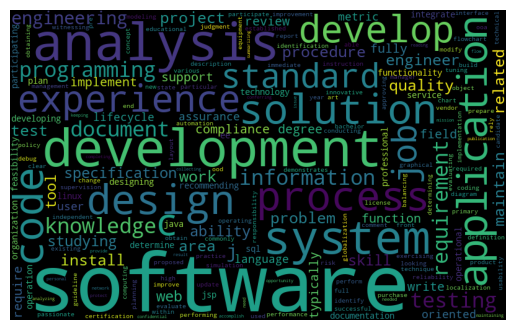

In [50]:
fig1 = plot_wordcloud(clean_text(job_desc_text))

## Word Frequency Barchart of Job Description
It appears that this job description is highly technical, emphasizing software development as its most frequent keywords. Moreover, it likely pertains to applications rather than webpages. The JD also accentuates the importance of experiences. Let's delve into the specific frequencies of these words by visualizing them in a bar chart:

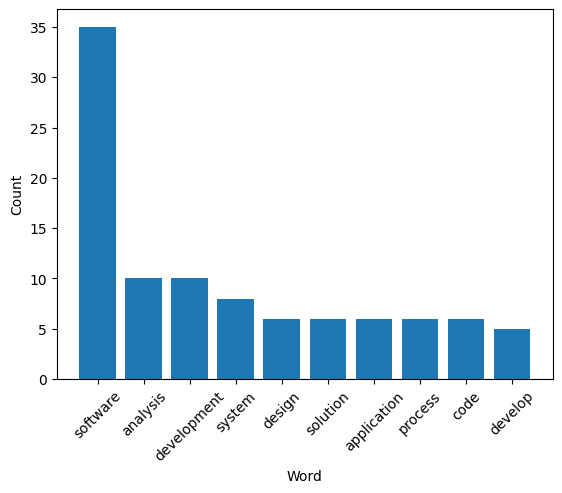

In [54]:
fig2 = plot_topwords(clean_text(job_desc_text))

## Visual Comparison of Job Description and Resume

Now, let's merge the two plots and examine how closely the cleaned resume text obtained from the previous section aligns with this job description:

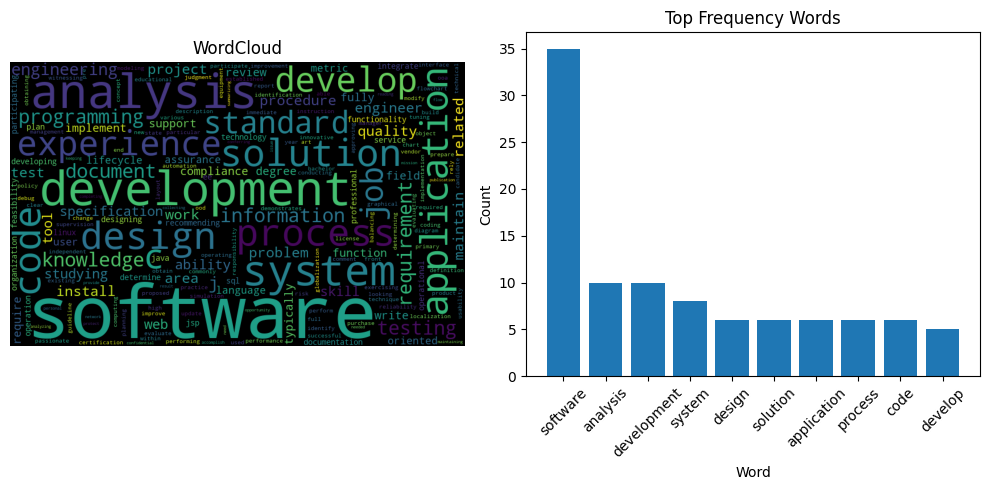

In [55]:
fig3 = plot_suite(clean_text(job_desc_text))

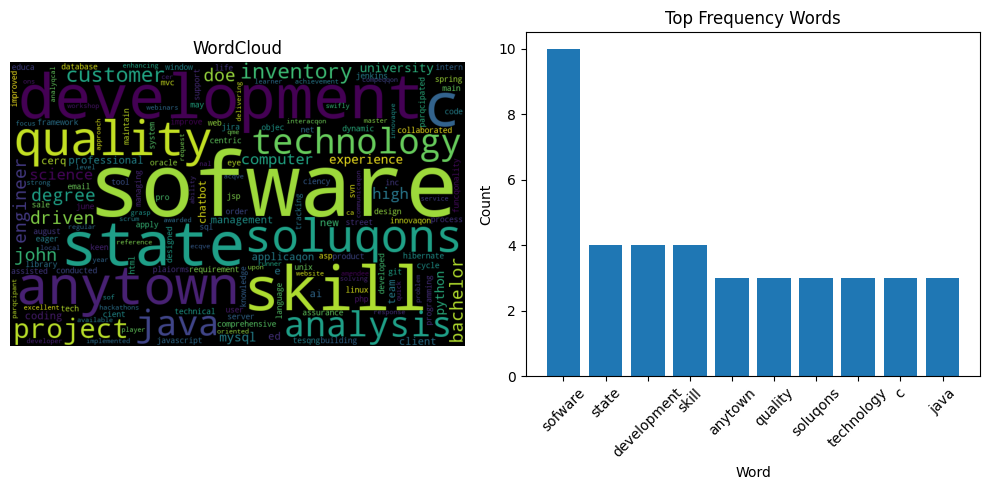

In [56]:
fig4 = plot_suite(cleaned_resume_text)

It appears there is a significant alignment between them, particularly in terms of the overlapping keywords related to software development. This is intuitively consistent with the calculation of the matching scores of these two texts using the metrics functions provided by the package.